In [14]:
import pandas as pd

df = pd.read_csv('./Data/chess_numeric.csv')

In [15]:
pd.options.display.float_format = '{:.2f}'.format
df["white_rating_diff"].describe()

count   1474939.00
mean          0.18
std          16.43
min        -660.00
25%          -6.00
50%           1.00
75%           6.00
max         690.00
Name: white_rating_diff, dtype: float64

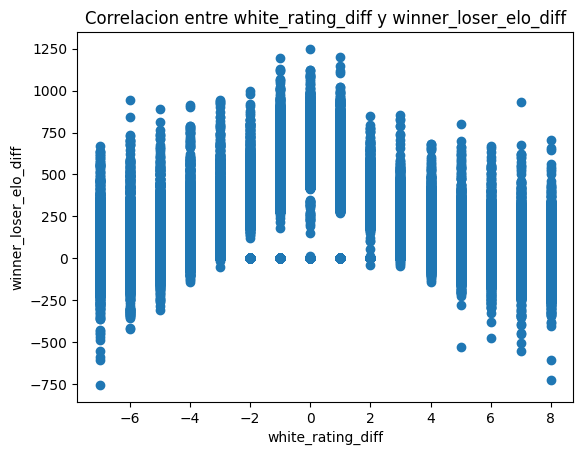

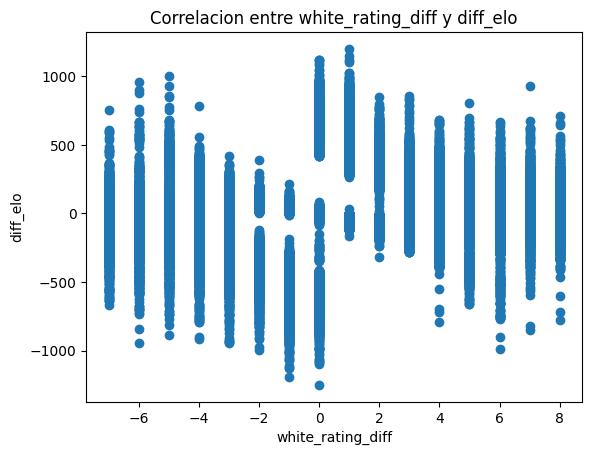

In [16]:
import matplotlib.pyplot as plt
df = df.loc[(df["white_rating_diff"] > df["white_rating_diff"].quantile(0.05))
            & (df["white_rating_diff"] < df["white_rating_diff"].quantile(0.95))]
df["diff_elo"] = df["white_elo"] - df["black_elo"]
x = df["white_rating_diff"]

plt.scatter(x, df['winner_loser_elo_diff'])
plt.title("Correlacion entre white_rating_diff y winner_loser_elo_diff")
plt.xlabel("white_rating_diff")
plt.ylabel("winner_loser_elo_diff")
plt.show()

plt.scatter(x, df['diff_elo'])
plt.title("Correlacion entre white_rating_diff y diff_elo")
plt.xlabel("white_rating_diff")
plt.ylabel("diff_elo")
plt.show()

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.loc[:, ["white_elo", "black_elo", "result"]]
y = df['white_rating_diff']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Mean Squared Error (MSE): 0.3329360766962278
R-squared (R2): 0.9885902132246202


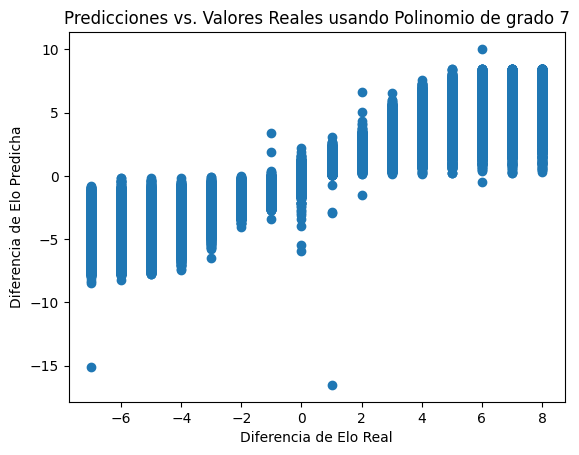

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

# Crear un modelo de regresión polinómica de grado 2
degree = 7
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)
y_pred_poly = polyreg.predict(X_test)

mse = mean_squared_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Gráfico de dispersión para visualizar las predicciones
plt.scatter(y_test, y_pred_poly)
plt.xlabel('Diferencia de Elo Real')
plt.ylabel('Diferencia de Elo Predicha')
plt.title('Predicciones vs. Valores Reales usando Polinomio de grado ' + str(degree))
plt.show()